In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [52]:
df = pd.read_csv('stud.csv')

In [53]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [54]:
X = df.drop(columns=['math_score'],axis=1)

In [55]:
Y = df['math_score']    

In [56]:
# Correctly identify numerical and categorical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('oh', oh_transformer, cat_features)
    ]
)

# Apply the preprocessor to the data
X = preprocessor.fit_transform(X)

In [57]:
X

array([[ 0.19399858,  0.39149181,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42747598,  1.31326868,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60515772,  0.58901542,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  1.        , ...,  0.        ,
         0.        ,  1.        ]], shape=(1000, 19))

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)   
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

CREATE AN EVALUATION FUNCTION TO GIVE ALL METRICS AFTER MODEL TRAINING 

In [59]:
def model_evaluation(true,predicted):
    print('Model Evaluation Metrics:')

    mea = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_absolute_error(true, predicted))
    r2_square = r2_score(true, predicted)
    
    return mea, rmse, r2_square

In [60]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Support Vector Regressor': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'CatBoost Regressor': CatBoostRegressor(verbose=0),
    'XGBoost Regressor': XGBRegressor(eval_metric='rmse')
}

model_list = []
r2_list = []    


In [62]:
for i in range(len(list(models))):

    model = list(models.values())[i] #iterate through the number of models
    model.fit(X_train, y_train)  #train the model
     
    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #evaluate the train test dataset using model_evaluation function
    train_mea, train_rmse, train_r2 = model_evaluation(y_train, y_train_pred)
    test_mea, test_rmse, test_r2 = model_evaluation(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance quantity on Train Data:')
    print(" Mean Absolute Error: {:4f}".format(train_mea))
    print(" Root Mean Squared Error: {:4f}".format(train_rmse))
    print(" R2 Score: {:4f}".format(train_r2))

    print('---------------------------------------------------------')

    print('Model Performance quantity on Test Data:')
    print(" Mean Absolute Error: {:4f}".format(test_mea))
    print(" Root Mean Squared Error: {:4f}".format(test_rmse))
    print(" R2 Score: {:4f}".format(test_r2))

    r2_list.append(test_r2)

    print('='*35)
    print('              ')
    print('\n')
   

Model Evaluation Metrics:
Model Evaluation Metrics:
Linear Regression
Model Performance quantity on Train Data:
 Mean Absolute Error: 4.266712
 Root Mean Squared Error: 2.065602
 R2 Score: 0.874317
---------------------------------------------------------
Model Performance quantity on Test Data:
 Mean Absolute Error: 4.214763
 Root Mean Squared Error: 2.052989
 R2 Score: 0.880433
              


Model Evaluation Metrics:
Model Evaluation Metrics:
Ridge Regression
Model Performance quantity on Train Data:
 Mean Absolute Error: 4.264988
 Root Mean Squared Error: 2.065185
 R2 Score: 0.874304
---------------------------------------------------------
Model Performance quantity on Test Data:
 Mean Absolute Error: 4.211101
 Root Mean Squared Error: 2.052097
 R2 Score: 0.880593
              


Model Evaluation Metrics:
Model Evaluation Metrics:
Lasso Regression
Model Performance quantity on Train Data:
 Mean Absolute Error: 5.206296
 Root Mean Squared Error: 2.281731
 R2 Score: 0.807147
----

In [63]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
1,Ridge Regression,0.880593
11,Ridge Regression,0.880593
0,Linear Regression,0.880433
10,Linear Regression,0.880433
8,CatBoost Regressor,0.851632
18,CatBoost Regressor,0.851632
16,Random Forest Regressor,0.851417
17,AdaBoost Regressor,0.847955
6,Random Forest Regressor,0.846152
7,AdaBoost Regressor,0.843904


Text(0, 0.5, 'Predicted Values')

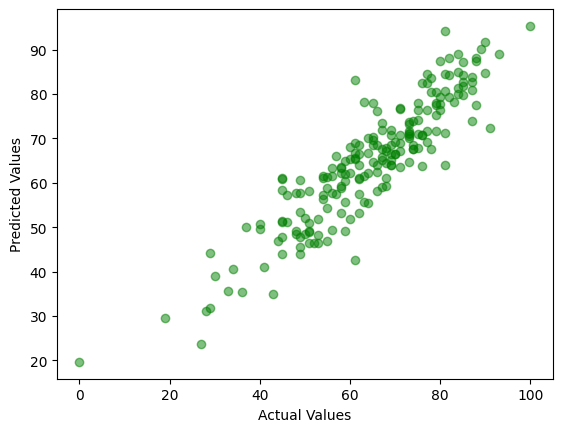

In [65]:
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5);
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

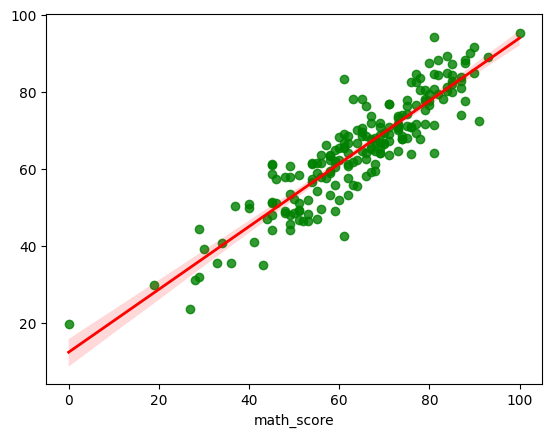

In [67]:
sns.regplot(x=y_test, y=y_test_pred, color='green', line_kws={'color': 'red', 'lw': 2});

In [73]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'Difference': y_test - y_test_pred})
pred_df

,Actual,Predicted,Difference
521,91,72.256554,18.743446
737,53,51.827824,1.172176
740,80,79.382545,0.617455
660,74,73.846962,0.153038
411,84,84.875084,-0.875084
...,...,...,...
408,52,46.441635,5.558365
332,62,60.786858,1.213142
208,74,67.617630,6.382370
613,65,69.601791,-4.601791
